### Exploratory Data Analysis

To understand the dataset’s structure, distributions, missing values, correlations, and anomalies before splitting it into task-specific files.

# Importing the necessary libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Loading the dataset and learing the data

In [5]:
uploaded = files.upload()

Saving Airline_Delay_Cause.csv to Airline_Delay_Cause.csv


In [6]:
df = pd.read_csv('Airline_Delay_Cause.csv')

In [7]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,...,0.0,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,...,0.0,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,...,0.0,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,...,0.0,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,...,0.0,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0


In [8]:
df.tail(1)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
171665,2013,8,F9,Frontier Airlines Inc.,MTJ,"Montrose/Delta, CO: Montrose Regional",1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df.shape

(171666, 21)

In [10]:
df.size

3604986

# Data types and Descriptive Statistics

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171666 entries, 0 to 171665
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 171666 non-null  int64  
 1   month                171666 non-null  int64  
 2   carrier              171666 non-null  object 
 3   carrier_name         171666 non-null  object 
 4   airport              171666 non-null  object 
 5   airport_name         171666 non-null  object 
 6   arr_flights          171426 non-null  float64
 7   arr_del15            171223 non-null  float64
 8   carrier_ct           171426 non-null  float64
 9   weather_ct           171426 non-null  float64
 10  nas_ct               171426 non-null  float64
 11  security_ct          171426 non-null  float64
 12  late_aircraft_ct     171426 non-null  float64
 13  arr_cancelled        171426 non-null  float64
 14  arr_diverted         171426 non-null  float64
 15  arr_delay        

In [12]:
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,171666.000000,171666.000000,171426.000000,171223.000000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000,171426.00000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000
mean,2018.551361,6.493633,362.528467,66.434387,20.796615,2.250347,19.381147,0.157096,23.770554,7.530497,0.863387,4239.48733,1437.185124,222.563497,920.651704,7.382725,1651.700063
std,2.890006,3.440908,992.894662,179.540694,50.315176,7.314252,61.675244,0.717405,72.393477,43.654880,3.772853,12618.56605,4215.677812,821.086511,3423.509335,41.779985,5221.878385
min,2013.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,4.000000,50.000000,6.000000,2.160000,0.000000,1.000000,0.000000,1.230000,0.000000,0.000000,335.00000,110.000000,0.000000,34.000000,0.000000,65.000000
50%,2019.000000,7.000000,100.000000,17.000000,6.400000,0.400000,3.910000,0.000000,5.000000,1.000000,0.000000,1018.00000,375.000000,18.000000,146.000000,0.000000,320.000000
75%,2021.000000,9.000000,250.000000,47.000000,17.260000,1.860000,11.710000,0.000000,15.260000,4.000000,1.000000,2884.00000,1109.000000,146.000000,477.000000,0.000000,1070.000000
max,2023.000000,12.000000,21977.000000,4176.000000,1293.910000,266.420000,1884.420000,58.690000,2069.070000,4951.000000,197.000000,438783.00000,196944.000000,31960.000000,112018.000000,3760.000000,227959.000000


In [13]:
df.describe(include = 'all')

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,171666.000000,171666.000000,171666,171666,171666,171666,171426.000000,171223.000000,171426.000000,171426.000000,...,171426.000000,171426.000000,171426.000000,171426.000000,171426.00000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000
unique,NaN,NaN,21,23,395,419,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,OO,SkyWest Airlines Inc.,DTW,"Detroit, MI: Detroit Metro Wayne County",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,25593,25593,1535,1535,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2018.551361,6.493633,NaN,NaN,NaN,NaN,362.528467,66.434387,20.796615,2.250347,...,0.157096,23.770554,7.530497,0.863387,4239.48733,1437.185124,222.563497,920.651704,7.382725,1651.700063
std,2.890006,3.440908,NaN,NaN,NaN,NaN,992.894662,179.540694,50.315176,7.314252,...,0.717405,72.393477,43.654880,3.772853,12618.56605,4215.677812,821.086511,3423.509335,41.779985,5221.878385
min,2013.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,4.000000,NaN,NaN,NaN,NaN,50.000000,6.000000,2.160000,0.000000,...,0.000000,1.230000,0.000000,0.000000,335.00000,110.000000,0.000000,34.000000,0.000000,65.000000
50%,2019.000000,7.000000,NaN,NaN,NaN,NaN,100.000000,17.000000,6.400000,0.400000,...,0.000000,5.000000,1.000000,0.000000,1018.00000,375.000000,18.000000,146.000000,0.000000,320.000000
75%,2021.000000,9.000000,NaN,NaN,NaN,NaN,250.000000,47.000000,17.260000,1.860000,...,0.000000,15.260000,4.000000,1.000000,2884.00000,1109.000000,146.000000,477.000000,0.000000,1070.000000


# Checking for null values

In [14]:
mv = df.isnull().sum()
mp = (mv / len(df))*100
mp = mp.round(2)
data = pd.DataFrame({'Missing Values :' : mv, 'Missing Percent : ' : mp})
data

,Missing Values :,Missing Percent :
year,0,0.00
month,0,0.00
carrier,0,0.00
carrier_name,0,0.00
airport,0,0.00
airport_name,0,0.00
arr_flights,240,0.14
arr_del15,443,0.26
carrier_ct,240,0.14
weather_ct,240,0.14


# Cleaning the data

In [15]:
df.fillna(df.mean(numeric_only=True), inplace=True)

# Total flights and delays per year

In [47]:
flights_per_year = df.groupby('year')['arr_flights'].sum()
flights_per_year = flights_per_year.apply(lambda x: f"{int(x):,}")
delays_per_year = df.groupby('year')['arr_del15'].sum()
delays_per_year = delays_per_year.apply(lambda x: f"{int(x):,}")

newdf = pd.DataFrame({'Flights': flights_per_year, 'Delays': delays_per_year})
newdf

,Flights,Delays
year,,
2013,"2,632,368","494,096"
2014,"5,827,786","1,242,055"
2015,"5,823,429","1,064,435"
2016,"5,624,546","965,700"
2017,"5,678,246","1,030,470"
2018,"7,212,357","1,353,493"
2019,"7,427,112","1,390,515"
2020,"4,720,981","449,193"
2021,"6,003,372","1,011,992"


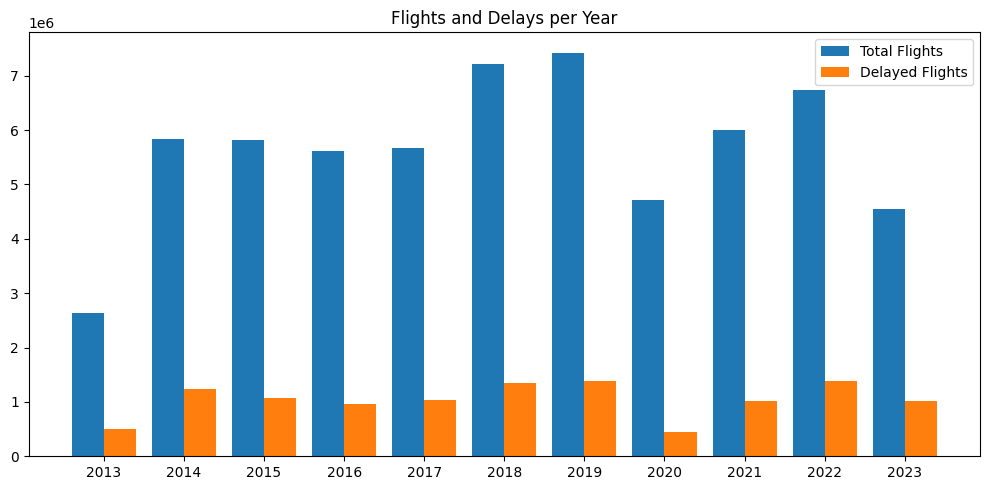

In [39]:
plt.figure(figsize=(10, 5))
bar_width = 0.4
years = flights_per_year.index
x = range(len(years))

plt.bar([i - bar_width/2 for i in x], flights_per_year.values, width=bar_width, label="Total Flights")
plt.bar([i + bar_width/2 for i in x], delays_per_year.values, width=bar_width, label="Delayed Flights")

plt.xticks(ticks=x, labels=years)
plt.title("Flights and Delays per Year")
plt.legend()
plt.tight_layout()
plt.show()


# Average arrival month delay

In [52]:
monthly_avg_delay = df.groupby('month')['arr_delay'].mean()
monthly_avg_delay = monthly_avg_delay.round(2)
monthly_avg_delay

,arr_delay
month,
1,4139.34
2,3876.21
3,3925.31
4,3839.06
5,4140.62
6,5579.57
7,5908.05
8,5097.25
9,3002.87


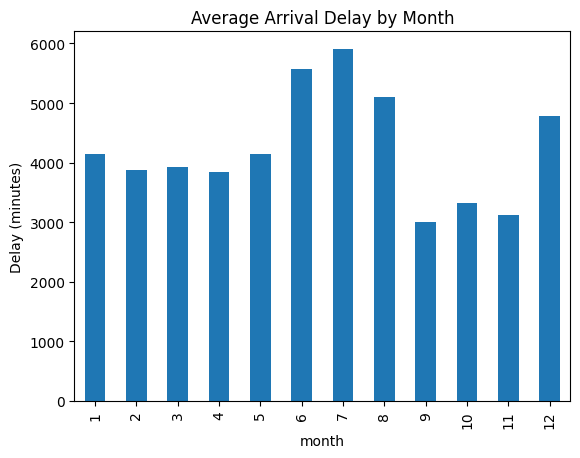

In [55]:
monthly_avg_delay.plot(kind='bar', title="Average Arrival Delay by Month", ylabel="Delay (minutes)")
plt.show()

# Top 10 carriers by delay

In [83]:
carrier_delays = df.groupby('carrier_name')['arr_del15'].sum().sort_values(ascending=False)
carrier_delays = carrier_delays.apply(lambda x : f"{int(x):,}")
carrier_delays.head(10)


,arr_del15
carrier_name,
Southwest Airlines Co.,"2,460,563"
American Airlines Inc.,"1,538,726"
Delta Air Lines Inc.,"1,202,604"
SkyWest Airlines Inc.,"1,172,593"
United Air Lines Inc.,"1,032,468"
JetBlue Airways,"648,251"
ExpressJet Airlines Inc.,"542,770"
Envoy Air,"396,418"
Spirit Air Lines,"331,305"


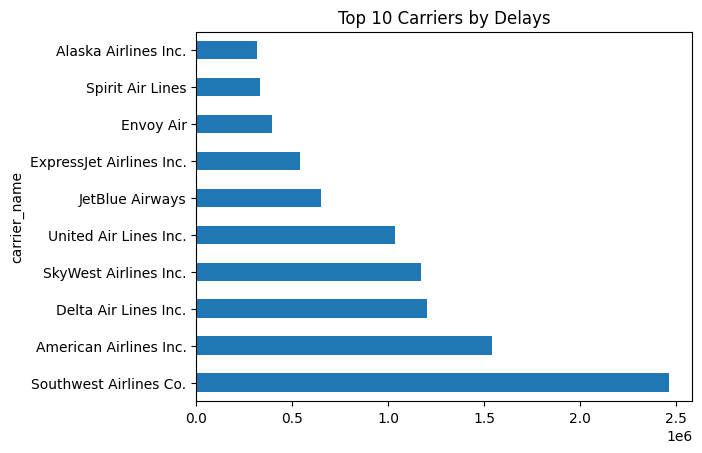

In [76]:
carrier_delays.head(10).plot(kind='barh', title="Top 10 Carriers by Delays")
plt.show()

# Average delay cause

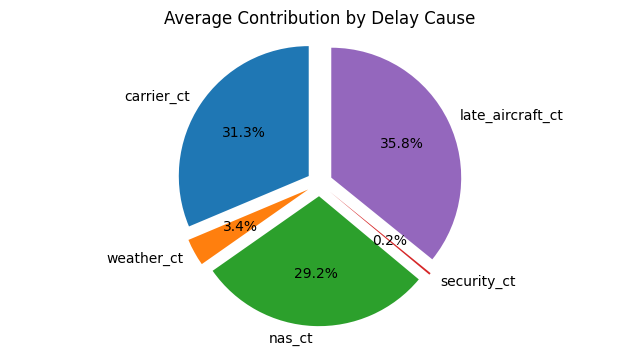

In [69]:
delay_reasons = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']

avg_delays = df[delay_reasons].mean()

plt.figure(figsize=(8, 4))
explode = [0.1, 0.1, 0.1, 0.1, 0.1]
plt.pie(avg_delays, labels=avg_delays.index, autopct='%1.1f%%', startangle=90, explode = explode)
plt.title("Average Contribution by Delay Cause")
plt.axis('equal')
plt.show()


# Average arrival delay over the years

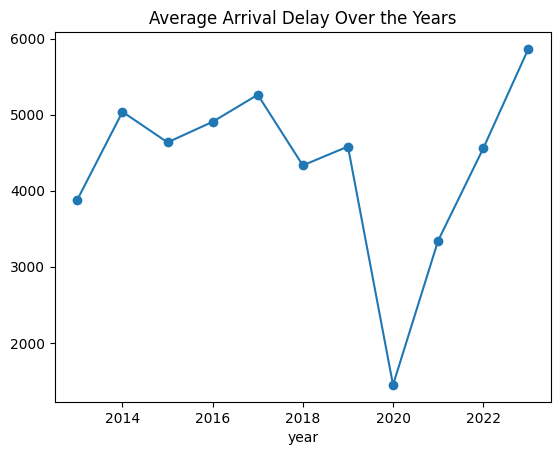

In [81]:
avg_delay_year = df.groupby('year')['arr_delay'].mean()
avg_delay_year.plot(marker='o', title="Average Arrival Delay Over the Years")
plt.show()

# Fligth cancelled and delayed ratio

In [70]:
cancelled_ratio = df['arr_cancelled'].sum() / df['arr_flights'].sum()
diverted_ratio = df['arr_diverted'].sum() / df['arr_flights'].sum()

print(f"Cancelled Flights Ratio: {cancelled_ratio:.2%}")
print(f"Diverted Flights Ratio: {diverted_ratio:.2%}")


Cancelled Flights Ratio: 2.08%
Diverted Flights Ratio: 0.24%


# Correlation analysis

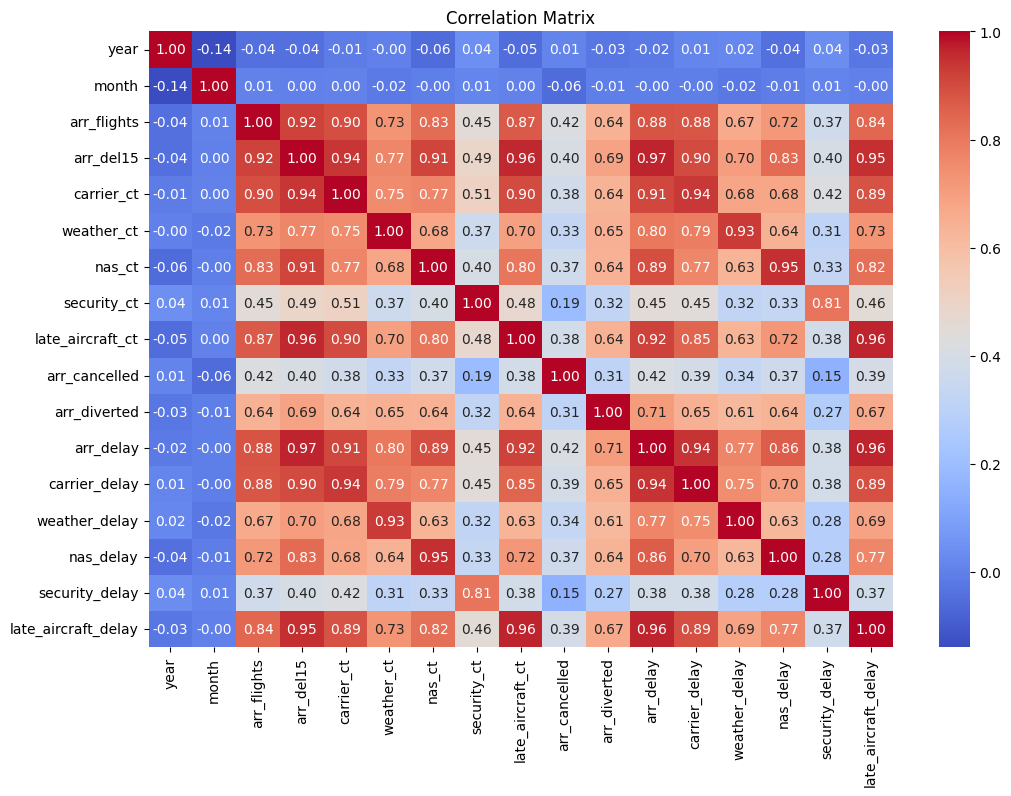

In [73]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only = True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
